In [49]:
from random import randint
import numpy as np
import os
import csv
import pylab as pl

In [50]:
def PlotResults01(results,title='',ylimAdjust=1):

    import pylab as pl    
    grid = np.array(results[1:],dtype=np.float)
    print(grid.max())
    
    #print(grid[:,0].shape)
    #print (results[0][1:])
    
    lineColours=['-b','-g','-r','-c','-m','-y','-k']
    co=0
    
    
    pl.figure(1, figsize=(9, 9))
    for colName in results[0][1:]:
        co+=1
        pl.plot(grid[:,0], grid[:,co], lineColours[co-1], label=colName)
        #pl.plot(grid[:,0], grid[:,1], '-b', label='dd')
    pl.title(title)
    pl.legend(loc='upper right')
    pl.ylabel('Population')
    pl.xlabel('Time')
    pl.grid(True)
    pl.ylim(0, grid.max()*ylimAdjust)
    del pl

In [51]:
def model02(
  #General Model Parameters
        popNumber
        ,simTime  #Number of time periods the model is run for
        ,defaultInfectedDays #i.e how long has the individual stops begin infectious after being infected
        ,vaxPercentage  
        ,numberContacts
        ,contactModel
        ,stdev=0
        ,displayResults=0
        ):
     
    
    
    #Create Population grid - pop
    #   Two column table -  one row for each patient
    cSusecpibleScore=0  # column1 is "Susecpible Score" i.e percentage chancew of how likely after contact will individual get infected 
    cInfectedDays=1     # column2 is "Infected Days" i.e how long has the individual stops begin infectious after being infected
                        #   a patient is considered infected if "Infected Days" is greated than 0
    pop = np.zeros(( popNumber, 2), dtype=np.int)
    #01 
    
    
    #Populate Susecpible  scrore column pop grid
    intialSusecpibleScore = np.random.randint(80, 90, pop.shape[0])
    pop[:,cSusecpibleScore]=intialSusecpibleScore[:]
    
    #vaxMask=np.random.randint(popNumber,size=int(popNumber*vaxPercentage))
    
    vaxMask=np.random.choice(popNumber, int(popNumber*vaxPercentage), replace=False)
  
    print (int(popNumber*vaxPercentage))
    pop[vaxMask,cSusecpibleScore]=np.random.randint(1,5, vaxMask.shape[0])
    
    #02
    
    
    #Randomly infect patient 0 
    intialInfected=randint(0, popNumber-1)
    pop[intialInfected,cInfectedDays] = defaultInfectedDays
    pop[intialInfected,cSusecpibleScore] = -1
    
    results=[] # A list to which the results are written
    headers=['Step','Susceptible','Infectious','Recovered'] # headers for results
    results.append(headers)
    
    
    for t in range(simTime): # t is the current time period loop
        #print("Step No: %s" %t)
    
        infectedList=np.where((pop[:,cInfectedDays]>0) )[0]     #List of infected indiviuduals
        infectedNo=infectedList.shape[0]                        #Number of infected indiviuduals               
    
     
        #Number of infected indiviuduals  - "Susecpible Score" = -1 (set after been infected) and InfectedDays = 0 i.e them have stopped been infectious
        recovered=np.where((pop[:,cSusecpibleScore]==-1) & (pop[:,cInfectedDays]==0) )[0].shape[0]
    
    
        #write to results list
        
        result=[t,popNumber-infectedNo-recovered,infectedNo,recovered]
        if displayResults==1:
            print (result)
            
        results.append(result)
        
        
        for infectedListIdx in infectedList: # loop though all infected indiviuduals
            
            if contactModel =='ContactModel01':
                contactsMask=np.random.randint(popNumber,size=numberContacts)
            if contactModel =='ContactModel02':
                contactsMask=np.array(np.random.normal(infectedListIdx,popNumber*stdev,numberContacts),dtype=np.int)
                contactsMask[contactsMask<0]=popNumber+contactsMask[contactsMask<0]
                contactsMask[contactsMask>=popNumber]=contactsMask[contactsMask>=popNumber] - popNumber
    
                
        
            #generates a random number between 1 and 100. If the random number is less than indiviuduals SusecpibleScore 
            # and the indiviudual is not already infected then the individual is infected
            rand=np.random.randint(1, 100,*contactsMask.shape)
            infectedMask=contactsMask[(pop[contactsMask,cSusecpibleScore]>rand) & (pop[contactsMask,cInfectedDays]==0)]
            pop[infectedMask,:]=[-1,defaultInfectedDays+1] #
    

    
        pop[(pop[:,cInfectedDays]>0),cInfectedDays]-=1 #reduce the number of days before each infected indiviudual stops being infectious7
    
    return results

Herd Imunity - low contract number and high vax percantage

700
999.0


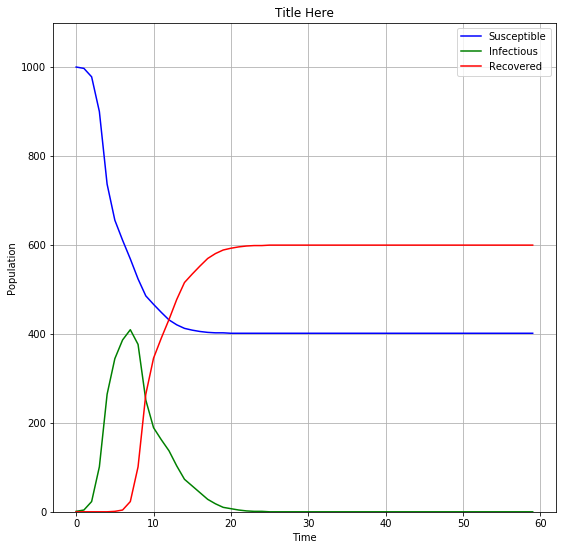

In [52]:
results = model02(
        popNumber= 1000
        ,simTime = 60 #Number of time periods the model is run for
        ,defaultInfectedDays = 5 #i.e how long has the individual stops begin infectious after being infected
        ,vaxPercentage=.7
        ,numberContacts=15
        ,contactModel ='ContactModel01'
        ,stdev=0.01
        ,displayResults=0
        )

#print(results)

PlotResults01(results,title='Title Here',ylimAdjust=1.1)

5000
9999.0


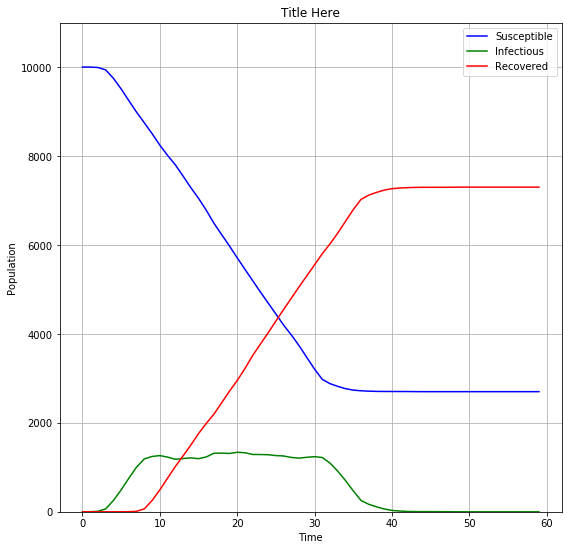

In [53]:
results = model02(
        popNumber= 10000
        ,simTime = 60 #Number of time periods the model is run for
        ,defaultInfectedDays = 5 #i.e how long has the individual stops begin infectious after being infected
        ,vaxPercentage=.5
        ,numberContacts=15
        ,contactModel ='ContactModel02'
        ,stdev=0.01
        ,displayResults=0 
        ) 
        
#print(results)

PlotResults01(results,title='Title Here',ylimAdjust=1.1)